In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import random
import matplotlib.pyplot as plt
% matplotlib inline

### Challenge 1

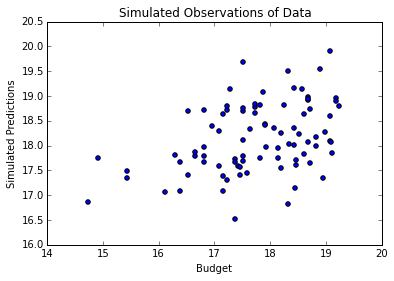

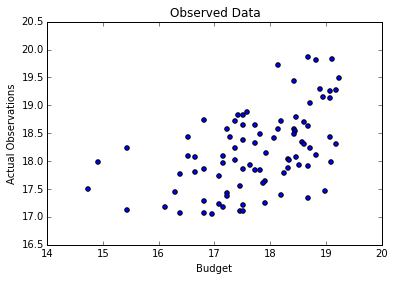

In [5]:
def simulate_outcomes(budget, sigma):
    return model.params['const'] + model.params['x1'] * budget + random.gauss(0, sigma)

df = pd.read_csv('2013_movies.csv')
df = df.dropna()

const = np.ones(len(df))
X = np.column_stack((np.log(df.Budget), const))
y = np.log(df.DomesticTotalGross)

model = sm.OLS(y,X).fit()

sigma = np.std(model.resid)
y_predict = [simulate_outcomes(np.log(df.Budget.ix[i]), sigma) for i in df.index]

plt.figure()
plt.scatter(np.log(df.Budget), y_predict)
plt.xlabel('Budget')
plt.ylabel('Simulated Predictions')
plt.title('Simulated Observations of Data')
plt.figure()
plt.scatter(np.log(df.Budget), np.log(df.DomesticTotalGross))
plt.xlabel('Budget')
plt.ylabel('Actual Observations')
plt.title('Observed Data')

### Challenge 2

### Challenge 3

In [6]:
df_train = df[:75]
df_test = df[75:]
const = np.ones(len(df_train))

X = np.column_stack((np.log(df_train.Budget), const))
Y = np.log(df_train.DomesticTotalGross)
model_train = sm.OLS(Y,X).fit()
train_MSE = model.mse_resid

const_test = np.ones(len(df_test))
X_test = np.column_stack((np.log(df_test.Budget), const_test))
y_pred_test = model_train.predict(X_test)
test_error = ((np.log(df_test.DomesticTotalGross) - y_pred_test) ** 2).mean()

In [7]:
print 'MSE Training: ' + str(train_MSE)
print 'MSE Test: ' + str(test_error)

MSE Training: 0.383799535608
MSE Test: 0.901266367461
